# Heart Failure Prediction
12 clinical features for predicting death events.

Source: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from IPython.core.interactiveshell import InteractiveShell # Importing so we can run multiple lines in one cell
InteractiveShell.ast_node_interactivity = "all" # Code so multiple lines in one cell can be ran simultaenously
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

warnings.filterwarnings('ignore')
%matplotlib inline

# ▶  Data Import

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Our target variable is **DEATH_EVENT**.  
We will try to predict **DEATH EVENT** using the other features.

# ▶  Data Exploration

In [15]:
# Grouping DEATH_EVENT by age
df.groupby(['age'], as_index=False)['DEATH_EVENT'].sum().sort_values(by='DEATH_EVENT', ascending=False)
df.groupby(['diabetes'], as_index=False)['DEATH_EVENT'].sum().sort_values(by='DEATH_EVENT', ascending=False)
df.groupby(['high_blood_pressure'], as_index=False)['DEATH_EVENT'].sum().sort_values(by='DEATH_EVENT', ascending=False)
df.groupby(['smoking'], as_index=False)['DEATH_EVENT'].sum().sort_values(by='DEATH_EVENT', ascending=False)

,age,DEATH_EVENT
20,60.000,13
10,50.000,8
26,65.000,8
31,70.000,7
5,45.000,6
34,75.000,6
38,80.000,5
32,72.000,5
15,55.000,3
19,59.000,3


,diabetes,DEATH_EVENT
0,0,56
1,1,40


,high_blood_pressure,DEATH_EVENT
0,0,57
1,1,39


,smoking,DEATH_EVENT
0,0,66
1,1,30


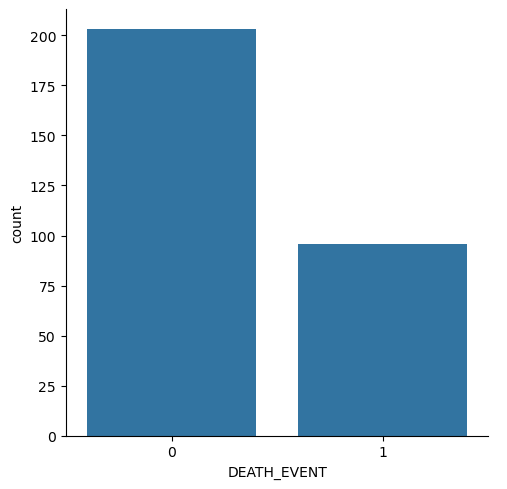

In [5]:
# Visualize distribution of DEATH_EVENT
sns.catplot(x='DEATH_EVENT', kind='count', data=df);

In [6]:
# Percentage of DEATH_EVENT
df['DEATH_EVENT'].value_counts(normalize=True) * 100

DEATH_EVENT
0    67.892977
1    32.107023
Name: proportion, dtype: float64

Even though our target class is imbalanced, it is only a 32.10% which is mild. We will leave it as-is

# ▶  Data Cleaning

### Detection and Treatment of Nulls

In [ ]:
df.isnull().sum()

### Detection and Treatment of Duplicated Values

In [ ]:
df.duplicated().value_counts()

### Generate Dataframe Profile and export to HTML

In [ ]:
from ydata_profiling import ProfileReport
import numba

profile_Report = ProfileReport(df, 
                               title="Heart Failure Prediction",
                               dataset={
                                        "description": "This profiling report was generated for the Heart Failure Prediction repository.",
                                        "author": "Bader Ale",
                                        "copyright_year": 2024,
                                        "url": "https://github.com/baderale/WGU_MSDA"}
                               )


profile_Report.to_widgets()
profile_Report.to_file('Profile Report.html')
print(numba.__version__)


# ▶  Exploratory Data Analysis

In [ ]:
df.dtypes

### The columns are described as follows:
1) age = age of patient
2) anaemia = Decrease of red blood cells or hemoglobin (boolean)
3) creatinine_phosphokinase = Level of the CPK enzyme in the blood (mcg/L)
4) diabetes = If the patient has diabetes (boolean)
5) ejection_fraction = Percentage of blood leaving the heart at each contraction (percentage)
6) high_blood_pressure = If the patient has hypertension (boolean)
7) platelets = Platelets in the blood (kiloplatelets/mL)
8) serum_creatinine = Level of serum creatinine in the blood (mg/dL)
9) serum_sodim = Level of serum sodium in the blood (mEq/L)
10) sex =   Woman or man (binary)
11) smoking = If the patient smokes or not (boolean)
12) time = Follow-up period (days)
13) DEATH_EVENT = If the patient deceased during the follow-up period (boolean)

### Univariate Analysis


In [ ]:
# Select numeric columns
num_cols = df.select_dtypes(include='number').columns

# Set the number of rows and columns for subplots
rows = min(len(num_cols), 4)
cols = 4

# Create a figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array
axes = axes.flatten()

# Plot histograms for each numeric column
for i, col in enumerate(num_cols):
    if i < len(axes):  # Ensure we only iterate over valid indices
        axes[i].hist(df[col], bins=20)
        axes[i].set_title(col)

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show();


In [ ]:
# Pairwise plots
sns.pairplot(df, hue='DEATH_EVENT')
plt.show()

# Box plots for each variable against 'DEATH_EVENT'
for column in df.columns:
    if column != 'DEATH_EVENT':
        sns.boxplot(x='DEATH_EVENT', y=column, data=df)
        plt.show()

# Heatmap of the correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show();

## § Model - XGBoost Classifier

In [ ]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1:]

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.33, random_state=123)

In [ ]:
X_train.shape
X_test.shape

In [ ]:
from xgboost import XGBClassifier

# create model instance
xgb_clf = XGBClassifier(n_estimators=15, max_depth=5, learning_rate=1, objective='binary:logistic')
# fit model
xgb_clf.fit(X_train, y_train)
# make predictions
preds = xgb_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

#Calculating accuracy
accuracy = accuracy_score(y_test, preds)

print("Accuracy:", accuracy)
#print("\nClassification Report:")
#print(classification_report(y_test, preds, target_names=df.columns))

## § Model - Support Vector Classifier

In [ ]:
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix 

In [ ]:
# Separating feautres from targets
df_features = df.drop('DEATH_EVENT', axis=1)
df_target = df['DEATH_EVENT']

In [ ]:
# Scaling features before model
df_features = StandardScaler().fit_transform(df_features)

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
#Create a svm Classifier
model = SVC()

#Train the model using the training sets
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 

Here's an interpretation of the various metrics in the classification report:

Precision:

Precision for class 0: 0.75
Precision for class 1: 0.76
Precision measures the accuracy of positive predictions made by the model. For class 0, it means that 75% of the instances predicted as class 0 were actually class 0, and for class 1, it means that 76% of the instances predicted as class 1 were actually class 1.

Recall:

Recall for class 0: 0.89
Recall for class 1: 0.54
Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify all instances of a particular class. For class 0, it means that 89% of the actual class 0 instances were correctly identified, while for class 1, only 54% of the actual class 1 instances were correctly identified.

F1-Score:

F1-Score for class 0: 0.82
F1-Score for class 1: 0.63
The F1-Score is the harmonic mean of precision and recall and is a balanced metric that considers both false positives and false negatives. For class 0, the F1-Score is 0.82, indicating a good balance between precision and recall, while for class 1, the F1-Score is 0.63, which is lower due to the lower recall for this class.

Support:

Support for class 0: 55
Support for class 1: 35
The support represents the number of instances in each class in the dataset. In this case, there are 55 instances of class 0 and 35 instances of class 1.

Accuracy:

Overall accuracy: 0.76
The accuracy represents the proportion of correctly classified instances over the total number of instances. The overall accuracy of the model is 76%, which means that 76% of the instances in the dataset were correctly classified.

Macro Average:

Macro average precision: 0.76
Macro average recall: 0.72
Macro average F1-Score: 0.72
The macro average calculates the precision, recall, and F1-Score by averaging the values for each class without considering class imbalance. In this case, the macro average precision, recall, and F1-Score are all around 0.72, indicating a moderate performance across both classes.

Weighted Average:

Weighted average precision: 0.76
Weighted average recall: 0.76
Weighted average F1-Score: 0.75
The weighted average calculates the precision, recall, and F1-Score by considering the class imbalance in the dataset. It gives more weight to the class with more instances. In this case, the weighted average precision, recall, and F1-Score are all around 0.76, which is slightly higher than the macro average and indicates that the model's performance is more influenced by class 0 due to its higher support.

## § Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['linear','rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 


In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

## § Model - Support Vector Classifier with Tuning

In [ ]:
#Create a svm Classifier
model_tuned = SVC(C=1000, gamma=0.001, kernel='rbf')

#Train the model using the training sets
model_tuned.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_tuned = model_tuned.predict(X_test)

In [ ]:
#Classification report before and after tuning

print('Before Tuning')
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 

print('\n\nAfter Tuning')
predictions_tuned = model_tuned.predict(X_test) 
print(classification_report(y_test, y_pred_tuned)) 

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import pandas as pd

# Assuming df is your DataFrame and "DEATH_EVENT" is the target variable
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

# Create a classifier to use for feature selection
classifier = RandomForestClassifier(random_state=42)

# Create the RFECV object
rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(10), scoring='accuracy')

# Fit the RFECV to the data
rfecv.fit(X, y)

# Print the optimal number of features
print('Optimal number of features: {}'.format(rfecv.n_features_))

# Get the features selected by RFECV
features = [f for f,s in zip(X.columns, rfecv.support_) if s]

print('The selected features are: {}'.format(features))